In [36]:
import datacube
import matplotlib.pyplot as plt

product_name = 'aerial_image_1999'

query = {
    'latitude': ( -19.909769510495842, -19.937043958977434),
    'longitude': ( -43.9339828491211, -43.96745681762696),
}


In [37]:
dc = datacube.Datacube()
dc.index.products.get_by_name(product_name)


product_info = dc.index.products.get_by_name(product_name)

resolution = product_info.definition['storage']['resolution']
crs = product_info.definition['storage']['crs']

In [46]:


dc = datacube.Datacube()
dc.index.products.get_by_name(product_name)


ds = dc.load(product=product_name, output_crs=crs, resolution=(resolution['x'],resolution['y']), **query)

print(ds)


<xarray.Dataset>
Dimensions:      (time: 1, x: 8814, y: 7608)
Coordinates:
  * time         (time) datetime64[ns] 1999-07-02
  * y            (y) float64 7.795e+06 7.795e+06 ... 7.798e+06 7.798e+06
  * x            (x) float64 6.116e+05 6.116e+05 ... 6.081e+05 6.081e+05
    spatial_ref  int32 29193
Data variables:
    band_1       (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    band_2       (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    band_3       (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           EPSG:29193
    grid_mapping:  spatial_ref


['1999-07-02T00:00:00.000000000']


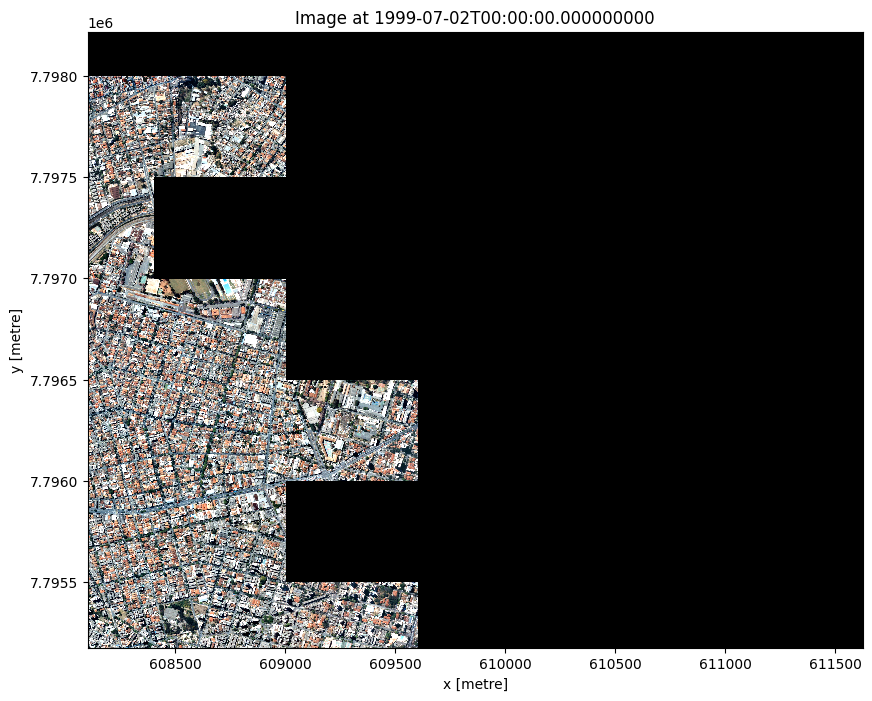

In [45]:
# Selecione as bandas desejadas
all_bands = ds.data_vars

available_times = ds.time.values
print(available_times)

# Especifique o tempo desejado (por exemplo, o primeiro tempo no conjunto de dados)
time_index = 0


selected_data = ds.isel(time=time_index).to_array().transpose('y', 'x', 'variable')



# Aumente o tamanho do plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))  # Ajuste os valores de largura e altura conforme necessário

# Plote a imagem com todas as bandas (ajuste conforme necessário)
# Nota: A visualização pode precisar ser ajustada dependendo do número e tipo de bandas
selected_data.plot.imshow(robust=True)
plt.title(f'Image at {ds["time"].values[time_index]}')
plt.show()
